<a href="https://colab.research.google.com/github/duongdqq/TF_guide/blob/master/3_train_n_evaluation_w_builtin_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# API overview: a first end-to-end example

In [39]:
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [40]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
print(len(x_train))
print(len(x_test))
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

60000
10000


In [42]:
print(len(x_train))
print(len(x_val))
print(len(x_test))
print('-'*10)
print(len(y_train))
print(len(y_val))
print(len(y_test))

50000
10000
10000
----------
50000
10000
10000


In [43]:
# specify the training configuration
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [44]:
# call fit() to slide data into batches
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    validation_data=(x_val, y_val)
) 

Epoch 1/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3377 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.1863 - val_sparse_categorical_accuracy: 0.9460
Epoch 2/2
782/782 [==============================] - 1s 2ms/step - loss: 0.1508 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.1335 - val_sparse_categorical_accuracy: 0.9611


In [45]:
# history holds record of the loss values and metric values during training
history.history

{'loss': [0.3377305567264557, 0.1508178561925888],
 'sparse_categorical_accuracy': [0.9039199948310852, 0.9549599885940552],
 'val_loss': [0.18628622591495514, 0.13353805243968964],
 'val_sparse_categorical_accuracy': [0.9459999799728394, 0.9610999822616577]}

In [46]:
# evaluate model on the test data
results = model.evaluate(x_val, y_val, batch_size=128)

79/79 [==============================] - 0s 1ms/step - loss: 0.1335 - sparse_categorical_accuracy: 0.9611


In [47]:
predictions = model.predict(x_test[:3])
predictions

array([[1.7879194e-06, 1.7838173e-07, 5.5737837e-05, 1.0455530e-04,
        6.4203824e-08, 1.4882244e-06, 9.8944984e-11, 9.9974054e-01,
        3.3444646e-06, 9.2379261e-05],
       [2.9537682e-06, 1.6467800e-04, 9.9959260e-01, 1.4996962e-04,
        2.4616869e-12, 1.2922469e-06, 5.0152778e-07, 1.5742895e-09,
        8.8022884e-05, 8.2672647e-11],
       [2.4299297e-05, 9.9207580e-01, 1.1150719e-03, 7.6321803e-04,
        1.6981586e-04, 1.2099812e-04, 2.8804262e-04, 3.4756502e-03,
        1.9116851e-03, 5.5392960e-05]], dtype=float32)

In [48]:
predictions.shape

(3, 10)

# The compile() method: specifying a loss, metrics, and an optimizer

* Specify optimizer, loss function and metrics by model.compile()

In [49]:
inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

* 1st method

In [50]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

* If model has multiple outputs, specify different losses and metrics for each output, and modulate the contribution of each output to the total loss of the model

* 2nd method

In [51]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

* For later reuse, put the model definition and compile step in function

In [52]:
def get_uncompiled_model():
  inputs = keras.Input(shape=(784,), name='digits')
  x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
  x = layers.Dense(64, activation='relu', name='dense_2')(x)
  outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [53]:
def get_compiled_model():
  model = get_uncompiled_model()
  model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
  )
  return model

### Many built-in optimizers, losses, and metrics are available

* Optimizers
  * SDG() with or without momentum
  * RMSprop()
  * Adam()
* Losses
  * MeanSquaredError()
  * KLDivergence()
  * CosineSimilarity()
* Metrics
  * AUC()
  * Precision()
  * Recall()

### Custom losses

* 1st method

In [54]:
def custom_mean_squared_error(y_true, y_pred):
  return tf.math.reduce_mean(tf.square(y_true - y_pred))

model = get_uncompiled_model()
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=custom_mean_squared_error
)

In [55]:
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 1s 2ms/step - loss: 0.0154


* 2nd method

* __init__(self): accept parameters to pass during the call of your loss function
* call(self, y_true, y_pred): use the targets (y_true) and the model predictions (y_pred) to compute the model's loss

In [56]:
class CustomMSE(keras.losses.Loss):
  def __init__(self, regularization_factor=0.1, name='custom_mse'):
    super().__init__(name=name)
    self.regularization_factor = regularization_factor

  def call(self, y_true, y_pred):
    mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
    reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
    return mse + reg * self.regularization_factor


model = get_compiled_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=CustomMSE())

y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 1s 2ms/step - loss: 0.0391


### Custom metrics

* __init__(self), in which you will create state variables for your metric.
* update_state(self, y_true, y_pred, sample_weight=None), which uses the targets * y_true and the model predictions y_pred to update the state variables.
* result(self), which uses the state variables to compute the final results.
* reset_states(self), which reinitializes the state of the metric.

* State update and results computation are kept separate (in update_state() and result(), respectively) because in some cases, results computation might be very expensive, and would only be done periodically.

In [57]:
class CategoricalTruePositives(keras.metrics.Metric):
  def __init__(self, name='categorical_true_positives', **kwargs):
    super(CategoricalTruePositives, self).__init__(name=name, **kwargs)
    self.true_positives = self.add_weight(name='ctp', initializer='zeros')

  
  def update_state(self, y_true, y_pred, sample_weight=None):
    y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
    values = tf.cast(y_true, 'int32') == tf.cast(y_pred, 'int32')
    values = tf.cast(values, 'float32')
    if sample_weight is not None:
      sample_weight = tf.cast(sample_weight, 'float32')
      values = tf.multiply(values, sample_weight)
    self.true_positives.assign_add(tf.reduce_sum(values))

  
  def result(self):
    return self.true_positives

  
  def reset_states(self):
  # The state of the metric will be reset at the start of each epoch.
    self.true_positives.assign(0.0)

In [58]:
model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[CategoricalTruePositives()])

model.fit(x_train, y_train, batch_size=128, epochs=3)


Epoch 1/3
391/391 [==============================] - 1s 2ms/step - loss: 0.4047 - categorical_true_positives: 44293.0000
Epoch 2/3
391/391 [==============================] - 1s 2ms/step - loss: 0.1831 - categorical_true_positives: 47298.0000
Epoch 3/3
391/391 [==============================] - 1s 2ms/step - loss: 0.1323 - categorical_true_positives: 48020.0000


### Handling losses and metrics that don't fit the standard signature

* The overwhelming majority of losses and metrics can be computed from y_true and y_pred, where y_pred is an output of your model. 
* But not all of them. For instance, a regularization loss may only require the activation of a layer (there are no targets in this case), and this activation may not be a model output.

* In such cases, you can call self.add_loss(loss_value) from inside the call method of a custom layer. 
* Losses added in this way get added to the "main" loss during training (the one passed to compile()). 
* Here's a simple example that adds activity regularization (note that activity regularization is built-in in all Keras layers -- this layer is just for the sake of providing a concrete example):

In [59]:
class ActivityRegularizationLayer(layers.Layer):
  def call(self, inputs):
    self.add_loss(tf.reduce_sum(inputs) * 0.1)
    return inputs  # pass through layer


inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)

# insert activity regurlarization as a layer
x = ActivityRegularizationLayer()(x)

x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

model.fit(x_train, y_train, batch_size=128, epochs=1)

391/391 [==============================] - 1s 2ms/step - loss: 3.0730


* You can do the same for logging metric values, using add_metric():

In [60]:
class MetricLoggingLayer(layers.Layer):
  def call(self, inputs):
    self.add_metric(keras.backend.std(inputs), 
                    name='std_of_activation', 
                    aggregation='mean')
    return inputs


inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)

# Insert std logging as a layer.
x = MetricLoggingLayer()(x)

x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)
model.fit(x_train, y_train, batch_size=64, epochs=1)

782/782 [==============================] - 1s 2ms/step - loss: 0.3419 - std_of_activation: 0.9719


* In the Functional API, you can also call 
* model.add_loss(loss_tensor), or 
* model.add_metric(metric_tensor, name, aggregation).

In [61]:
inputs = keras.Input(shape=(784,), name='digits')
x1 = layers.Dense(64, 'relu', name='dense1')(inputs)
x2 = layers.Dense(64, 'relu', name='dense2')(x1)
outputs = layers.Dense(10, name='predictions')(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

model.add_loss(tf.reduce_sum(x1) * 0.1)
model.add_metric(keras.backend.std(x1), name='std_of_activation', aggregation='mean')

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, batch_size=256, epochs=1)

196/196 [==============================] - 1s 3ms/step - loss: 5.2351 - std_of_activation: 0.0067


* Note that when you pass losses via add_loss(), it becomes possible to call compile() without a loss function, since the model already has a loss to minimize.
* Consider the following LogisticEndpoint layer: it takes as inputs targets & logits, and it tracks a crossentropy loss via add_loss(). It also tracks classification accuracy via add_metric().

In [62]:
class LogisticEndpoint(keras.layers.Layer):
  def __init__(self, name=None):
    super(LogisticEndpoint, self).__init__(name=name)
    self.loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
    self.accuracy_fn = keras.metrics.BinaryAccuracy()

  def call(self, targets, logits, sample_weights=None):
    # Compute the training-time loss value and add it
    # to the layer using `self.add_loss()`.
    loss = self.loss_fn(targets, logits, sample_weights)
    self.add_loss(loss)

    # Log accuracy as a metric and add it
    # to the layer using `self.add_metric()`.
    acc = self.accuracy_fn(targets, logits, sample_weights)
    self.add_metric(acc, name='accuracy')

    # Return the inference-time prediction tensor (for `.predict()`).
    return tf.nn.softmax(logits)

* You can use it in a model with two inputs (input data & targets), compiled without a loss argument, like this:

In [63]:
import numpy as np

inputs = keras.Input(shape=(3,), name='inputs')
targets = keras.Input(shape=(10, ), name='targets')
logits = keras.layers.Dense(10)(inputs)
predictions = LogisticEndpoint(name='pred')(logits, targets)

model = keras.Model(inputs=[inputs, targets], outputs=predictions)
model.compile(optimizer='adam')  

data = {'inputs': np.random.random((3,3)),
        'targets': np.random.random((3,10))}

model.fit(data)

1/1 [==============================] - 0s 2ms/step - loss: 1.0465 - binary_accuracy: 0.0000e+00


### Automatically setting apart a validation holdout set

* Here's another option: the argument validation_split allows you to automatically reserve part of your training data for validation. The argument value represents the fraction of the data to be reserved for validation, so it should be set to a number higher than 0 and lower than 1. For instance, validation_split=0.2 means "use 20% of the data for validation", and validation_split=0.6 means "use 60% of the data for validation".

In [64]:
model = get_compiled_model()
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1)

625/625 [==============================] - 1s 2ms/step - loss: 0.3688 - sparse_categorical_accuracy: 0.8962 - val_loss: 0.2164 - val_sparse_categorical_accuracy: 0.9356


# Training & evaluation from tf.data Datasets

* the case where your data comes in the form of a tf.data.Dataset object
* tf.data API is a set of utilities in TF 2.0 for loading and preprocessing data in a way that is fast and scalable
* can pass a Dataset instance directly to the methods fit(), evaluate(), and predict()

In [65]:
model = get_compiled_model()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 1024).batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)

model.fit(train_dataset, epochs=3)

result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, results))

Epoch 1/3
782/782 [==============================] - 1s 2ms/step - loss: 0.3464 - sparse_categorical_accuracy: 0.9022
Epoch 2/3
782/782 [==============================] - 1s 2ms/step - loss: 0.1574 - sparse_categorical_accuracy: 0.9531
Epoch 3/3
157/157 [==============================] - 0s 1ms/step - loss: 0.1157 - sparse_categorical_accuracy: 0.9636


{'loss': 0.1335381269454956, 'sparse_categorical_accuracy': 0.9610999822616577}

* the Dataset is reset at the end of each epoch, so it can be reused of the next epoch.
* If you want to run training only on a specific number of batches from this Dataset, you can pass the steps_per_epoch argument, which specifies how many training steps the model should run using this Dataset before moving on to the next epoch.
* If you do this, the dataset is not reset at the end of each epoch, instead we just keep drawing the next batches. The dataset will eventually run out of data (unless it is an infinitely-looping dataset).

In [66]:
model = get_compiled_model()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

model.fit(train_dataset, epochs = 3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 0s 2ms/step - loss: 0.7809 - sparse_categorical_accuracy: 0.7877
Epoch 2/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3760 - sparse_categorical_accuracy: 0.8920
Epoch 3/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3330 - sparse_categorical_accuracy: 0.9027


## Using a validation dataset

* pass a Dataset instance as the validation_data argument in fit()

In [67]:
model = get_compiled_model()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(train_dataset, validation_data=val_dataset, epochs=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.3415 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.1964 - val_sparse_categorical_accuracy: 0.9451


* At the end of each epoch, the model will iterate over the validation dataset and compute the validation loss and validation metrics.
* If you want to run validation only on a specific number of batches from this dataset, you can pass the validation_steps argument, which specifies how many validation steps the model should run with the validation dataset before interrupting validation and moving on to the next epoch:

In [68]:
model = get_compiled_model()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)

model.fit(
    train_dataset,
    epochs=1,
    validation_data=val_dataset,
    validation_steps=10
)

782/782 [==============================] - 2s 2ms/step - loss: 0.3335 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.3152 - val_sparse_categorical_accuracy: 0.9219


* the validation dataset will be reset after each use (so that you will always be evaluating on the same samples from epoch to epoch).
* The argument validation_split (generating a holdout set from the training data) is not supported when training from Dataset objects, since this feature requires the ability to index the samples of the datasets, which is not possible in general with the Dataset API.

# Other input formats supported

* Pandas dataframes
* from python generator that yield batches of data & labels
* In particular, the keras.utils.Sequence class offers a simple interface to build Python data generators that are multiprocessing-aware and can be shuffled.

* In general, we recommend that you use:

* NumPy input data if your data is small and fits in memory
* Dataset objects if you have large datasets and you need to do distributed training
* Sequence objects if you have large datasets and you need to do a lot of custom Python-side processing that cannot be done in TensorFlow (e.g. if you rely on external libraries for data loading or preprocessing).


# Using a keras.utils.Sequence object as input

* keras.utils.Sequence is a utility that you can subclass to obtain a Python generator with two important properties:

* It works well with multiprocessing.
* It can be shuffled (e.g. when passing shuffle=True in fit()).

* A Sequence must implement two methods:

* __getitem__
* __len__
* The method __getitem__ should return a complete batch. If you want to modify your dataset between epochs, you may implement on_epoch_end.

In [69]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from keras.utils import Sequence

class CIFAR10Sequence(Sequence):
  def __init__(self, filenames, labels, batch_size):
    self.filenames, self.labels = filenames, labels
    self.batch_size = batch_size

  
  def __len__(self):
    return int(np.ceil(len(self.filenames) / float(self.batch_size)))

  
  def __getitem__(self, idx):
    batch_x = self.filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
    return 
    np.array([resize(imread(filename), (200, 200)) for filename in batch_x]),
    np.array(batch_y)


sequence = CIFAR10Sequence(filenames, labels, batch_size)
model.fit(sequence, epochs=10)

NameError: ignored

# Using sample weighting and class weighting

* With the default settings the weight of a sample is decided by its frequency in the dataset. 
* There are two methods to weight the data, independent of sample frequency:
  * class weight
  * sample weight

## Class weights

* This is set by passing a dictionary to the class_weight argument to Model.fit()
* This dictionary maps class indices to the weight that should be used for samples belonging to this class.
* This can be used to balance classes without resampling, or to train a model that gives more importance to a particular class.
* For instance, if class "0" is half as represented as class "1" in your data, you could use Model.fit(..., class_weight={0: 1., 1: 0.5}).
* Here's a NumPy example where we use class weights or sample weights to give more importance to the correct classification of class #5 (which is the digit "5" in the MNIST dataset).

In [ ]:
import numpy as np

class_weight = {
    0: 1.0,
    1: 1.0,
    2: 1.0,
    3: 1.0,
    4: 1.0,
    5: 2.0,  # noticeable
    6: 1.0,
    7: 1.0,
    8: 1.0,
    9: 1.0
}

print('fit with class weight')
model = get_compiled_model()
model.fit(x_train, y_train, class_weight=class_weight, batch_size=64, epochs=1)

## Sample weights

* A "sample weights" array is an array of numbers that specify how much weight each sample in a batch should have in computing the total loss. 
* It is commonly used in imbalanced classification problems (the idea being to give more weight to rarely-seen classes).
* When the weights used are ones and zeros, the array can be used as a mask for the loss function (entirely discarding the contribution of certain samples to the total loss).
* For fine grained control, or if you are not building a classifier, you can use "sample weights".
  * When training from NumPy data: Pass the sample_weight argument to Model.fit().
  * When training from tf.data or any other sort of iterator: Yield (input_batch, label_batch, sample_weight_batch) tuples.

In [ ]:
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0

print('fit with sample weight')
model = get_compiled_model()
model.fit(x_train, y_train, sample_weight=sample_weight, batch_size=64, epochs=1)

In [ ]:
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0

# create a dataset that includes sample weights
# 3rd element in the return tuple
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train, sample_weight))

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

model = get_compiled_model()
model.fit(train_dataset, epochs=1)

# Passing data to multi-input, multi-output models

* Consider the following model, which has an image input of shape (32, 32, 3) (that's (height, width, channels)) and a timeseries input of shape (None, 10) (that's (timesteps, features))
* Our model will have two outputs computed from the combination of these inputs: a "score" (of shape (1,)) and a probability distribution over five classes (of shape (5,)).

In [70]:
image_input = keras.Input(shape=(32, 32, 3), name='img_input')
timeseries_input = keras.Input(shape=(None, 10), name='ts_input')

x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name='score_output')(x)
class_output = layers.Dense(5, name='class_output')(x)

model = keras.Model(
    inputs=[image_input, timeseries_input], outputs=[score_output, class_output]
)

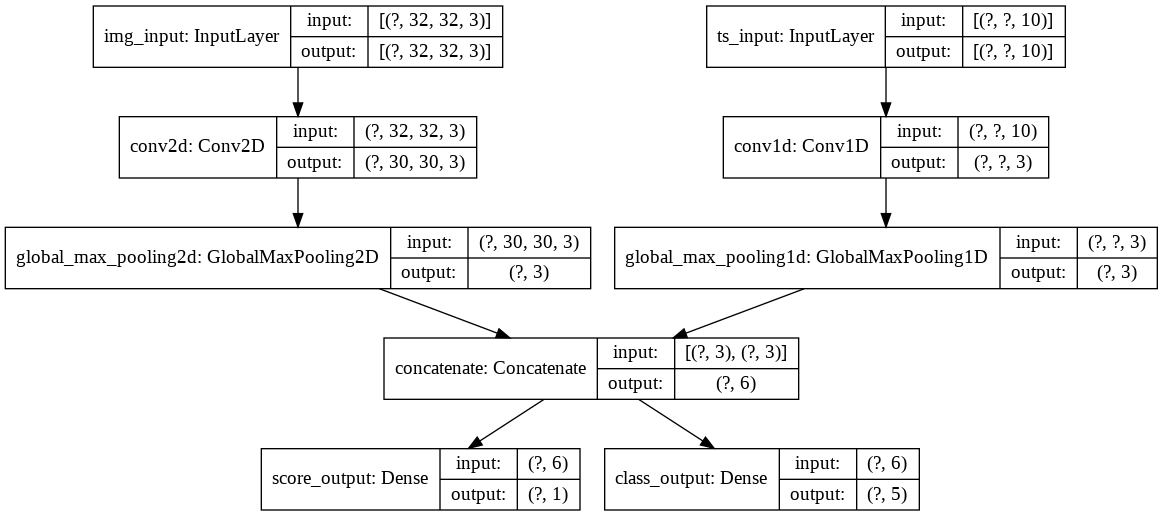

In [71]:
keras.utils.plot_model(model, '123.png', show_shapes=True)

* At compilation time, we can specify different losses to different outputs, by passing the loss functions as a list:

In [72]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()]
)

* likewise for metrics

In [74]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
    metrics=[
             [
              keras.metrics.MeanAbsolutePercentageError(),
              keras.metrics.MeanAbsoluteError()
             ],
             [keras.metrics.CategoricalAccuracy()]
    ]
)

* Since we gave names to our output layers, we could also specify per-output losses and metrics via a dict:

In [75]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        'score_output': keras.losses.MeanSquaredError(), 
        'class_output': keras.losses.CategoricalCrossentropy()
        },
    metrics={
             'score_output': [
              keras.metrics.MeanAbsolutePercentageError(),
              keras.metrics.MeanAbsoluteError()
             ],
             'class_output': [keras.metrics.CategoricalAccuracy()]
    }
)

* It's possible to give different weights to different output-specific losses (for instance, one might wish to privilege the "score" loss in our example, by giving to 2x the importance of the class loss), using the loss_weights argument:

In [76]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        'score_output': keras.losses.MeanSquaredError(), 
        'class_output': keras.losses.CategoricalCrossentropy()
        },
    metrics={
             'score_output': [
              keras.metrics.MeanAbsolutePercentageError(),
              keras.metrics.MeanAbsoluteError()
             ],
             'class_output': [keras.metrics.CategoricalAccuracy()]
    },
    loss_weights={
        'score_output': 2.0,
        'class_output': 1.0}
)

* You could also chose not to compute a loss for certain outputs, if these outputs meant for prediction but not for training:

In [77]:
# list loss version
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
          None,
          keras.losses.CategoricalCrossentropy()
    ]
)

# or dict loss version
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
          'class_output': keras.losses.CategoricalCrossentropy()
    }
)

* Passing data to a multi-input or multi-output model in fit works in a similar way as specifying a loss function in compile: 
* you can pass lists of NumPy arrays (with 1:1 mapping to the outputs that received a loss function) or dicts mapping output names to NumPy arrays.

In [78]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
)

# Generate dummy NumPy data
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

# Fit on lists
model.fit([img_data, ts_data], [score_targets, class_targets], batch_size=32, epochs=1)

# Alternatively, fit on dicts
model.fit(
    {"img_input": img_data, "ts_input": ts_data},
    {"score_output": score_targets, "class_output": class_targets},
    batch_size=32,
    epochs=1,
)

4/4 [==============================] - 0s 8ms/step - loss: 17.5177 - score_output_loss: 0.4121 - class_output_loss: 17.1056


* Here's the Dataset use case: similarly as what we did for NumPy arrays, the Dataset should return a tuple of dicts.

In [83]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"img_input": img_data, "ts_input": ts_data},
        {"score_output": score_targets, "class_output": class_targets},
    )
    
)

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

model.fit(train_dataset, epochs=1)

2/2 [==============================] - 0s 10ms/step - loss: 13.9787 - score_output_loss: 0.2351 - class_output_loss: 13.7436


# Using callbacks

## Many built-in callbacks are available

## Writing your own callback

# Checkpointing models


# Using learning rate schedules

## Passing a schedule to an optimizer

## Using callbacks to implement a dynamic learning rate schedule

# Visualizing loss and metrics during training

## Using the TensorBoard callback